# Automates finis - TP 2 

### Objectif du TP

L'objectif de ce TP est d'implémenter la déterminisation d'un automate fini. Cela implique deux étapes : premièrement, étant donné un automate fini (potenitellement) non déterministe donné en entrée, il faut appliquer l'algorithme d'élimination des transitions epsilon. Deuxièmement, il faut appliquer l'algorithme de réduction des transitions de façon à créer des nouveaux états composés par des ensembles d'états joignables avec l'automate initial. Finalement, nous vous conseillons de renommer les états de l'automate déterminisé, par exemple, pour mieux le visualiser avec `to_graphviz`.

### Algorithme d'élimination des transitions epsilon

Dans la bibliothèque `automaton.py` fournie, les transitions epsilon sont représentées par le symbole `%` dans le fichier d'entrée. Ainsi, l'automate ci-dessous est une version non déterministe de l'automate qui reconnait l'expresison régulière `a*+b*`:

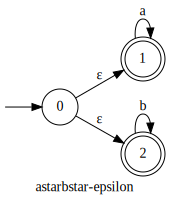

In [1]:
import automaton
a = automaton.Automaton("astarbstar-epsilon")
source = """0 % 1
1 a 1
0 % 2
2 b 2
A 1 2
"""
a.from_txt(source)
a

Dans l'algorithme d'élimination des transitions epsilon, nous devons tout d'abord identifier un état _k_ dans lequel aboutit une transition epsilon. Disons que c'est l'état 1. Ensuite, nous devons identifier tous les états _q_ menant à _k_ avec une transition epsilon (en l'occurrence, _q=0_ et _k=1_). Finalement, il faut rajouter des transitions depuis _q=0_ vers tous les états _r_ destination d'une transition qui part de _k_. Ici, _r=1_ et le symbole _x_ de cette nouvelle transition de _q_ vers _r_ est _a_. En somme, il faut rajouter une transition depuis _0_ vers _1_ avec _a_:

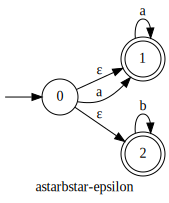

In [2]:
a.add_transition("0","a","1")
a

Puis, on peut supprimer la transition epsilon cible. Ici, l'état _1_ est un état d'acceptation, donc _0_ devient aussi un état d'acceptation:

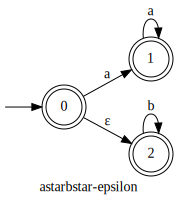

In [3]:
a.remove_transition("0","%","1")
a.make_accept("0")
a

Une fois que l'algorithme est appliqué à toutes les transitions epsilon, le résultat sera celui-ci :

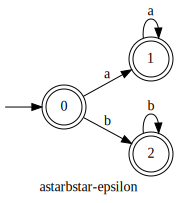

In [4]:
a.add_transition("0","b","2")
a.remove_transition("0","%","2")
a.make_accept("0") # Il l'est déjà, mais on doit être systématique
a

### Algorithme de réduction des transitions

La deuxième étape de la déterminisation est la réduction des transitions. Pour l'illustrer, nous partirons de l'automate ci-dessous qui reconnait le langage des mots sur _{a,b}_ qui finissent par _b_, décrit par l'expression régulière _(a+b)*b_:

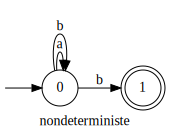

In [5]:
import automaton
source = """0 a 0
0 b 0
0 b 1
A 1"""
a = automaton.Automaton("nondeterministe")
a.from_txt(source)
a

Pour initialiser l'algorithme, nous construisons un ensemble de nouveaux états à traiter. Elle est initialisée avec une liste composé de l'état initial seul (chaque nouvel état de l'automate déterminisé sera une liste d'états de l'automate original) :

In [6]:
new_states = [set([a.initial.name])] # une liste d'ensembles
new_states

[{'0'}]

Ensuite, pour chaque élément de cette liste (qui continuera à grandir), nous constuisons de nouveaux états correspondant à l'ensemble d'états de l'automate initial vers lesquels on peut aller avec chaque symbole. Par exemple, avec _a_ on peut rester dans _0_, et avec _b_ on peut aller dans _0_ et _1_. On va donc rajouter un état à notre liste, et les transitions correspondantes à l'automate déterminisé :

In [7]:
new_states.append(set([a.statesdict["0"].name, a.statesdict["1"].name]))
new_states

[{'0'}, {'0', '1'}]

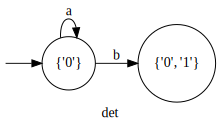

In [8]:
det = automaton.Automaton("det")
det.add_transition(str(new_states[0]),"a",str(new_states[0]))
det.add_transition(str(new_states[0]),"b",str(new_states[1]))
det

Ensuite, il faudra appliquer la même procédure aux nouvel état _{0,1}_, pour enfin obtenir l'automate déterminisé:

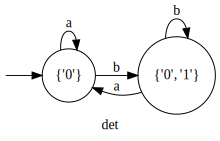

In [9]:
det.add_transition(str(new_states[1]),"b",str(new_states[1]))
det.add_transition(str(new_states[1]),"a",str(new_states[0]))
det

Une fois qu'aucun nouvel état est ajouté à _new_states_, on peut arrêter la procédure et ajouter les états d'acceptation dans le nouvel automate, qui sont tous ceux qui contiennent au moins un état d'acceptation de l'automate original:

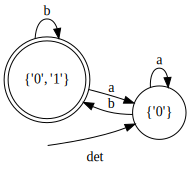

In [10]:
det.make_accept(str(new_states[1]))
det

Les étiquettes d'états sont actuellement des ensembles. Une fois l'algorithme fini, vous pouvez (si vous le souhaitez, c'est pas obligatoire) renommer les états avec des noms plus courts :

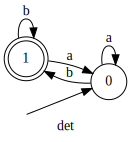

In [11]:
namecount = 0 # On va numéroter les nouveaux états 0, 1, 2...
for statename in det.states : # Pour tous les états du nouvel automate    
    newname = str(namecount) # transformer int -> str
    det.rename_state(statename, newname) # renommer l'état est une fonction de la bibliothèque
    namecount = namecount + 1 # incrémente le compteur de nouveaux états
det

# Travail à effectuer

Vous devez modifier votre programme du TP1 de façon à ce que, au lieu d'afficher "ERROR" pour un automate non déterministe, le script maintenant le déterminise puis applique l'algorithme de reconnaissance sur l'automate résultant. Vous développerez donc un programme capable de dire si un mot est reconnu ou non par un automate quelconque, déterministe ou non déterministe. Voici quelques exemples d'exécution de votre programme sur la ligne de commande.

```bash
$ ./tp2-automates.py test/astarbstar-epsilon.af abb
NO
$ ./tp2-automates.py test/astarbstar-nfa.af abb
NO
$ ./tp2-automates.py test/astarbstar-epsilon.af aaa
YES
$ ./tp2-automates.py test/astarbstar-nfa.af bbb
YES
$ ./tp2-automates.py test/astarbstar-nfa.af %
YES
```

Notez que nous avons créé une copie de `tp1-automates.py` vers `tp2-automates.py` pour éviter de perdre le travail accompli en cas de problème et pouvoir à tout moment repartir à zéro si besoin.